# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df_sessions_history = pd.read_csv('/datasets/sessions_project_history.csv')
df_sessions_history.info()
df_sessions_history.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435924 entries, 0 to 435923
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            435924 non-null  object
 1   session_id         435924 non-null  object
 2   session_date       435924 non-null  object
 3   session_start_ts   435924 non-null  object
 4   install_date       435924 non-null  object
 5   session_number     435924 non-null  int64 
 6   registration_flag  435924 non-null  int64 
 7   page_counter       435924 non-null  int64 
 8   region             435924 non-null  object
 9   device             435924 non-null  object
dtypes: int64(3), object(7)
memory usage: 33.3+ MB


,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [3]:
# 1. Группируем по user_id и считаем уникальные session_id
sessions_count = df_sessions_history.groupby('user_id')['session_id'].nunique()

# 2. Находим user_id с максимальным количеством сессий
max_sessions_user = sessions_count.idxmax()

print(f"Пользователь с наибольшим количеством сессий: {max_sessions_user}")

# 3. Выводим все записи для этого пользователя
user_sessions = df_sessions_history[df_sessions_history['user_id'] == max_sessions_user]

print("Данные для выбранного пользователя:")
print(user_sessions)

Пользователь с наибольшим количеством сессий: 10E0DEFC1ABDBBE0
Данные для выбранного пользователя:
                 user_id        session_id session_date     session_start_ts  \
115558  10E0DEFC1ABDBBE0  B8F0423BBFFCF5DC   2025-08-14  2025-08-14 13:57:39   
191751  10E0DEFC1ABDBBE0  87CA2FA549473837   2025-08-15  2025-08-15 16:42:10   
239370  10E0DEFC1ABDBBE0  4ADD8011DCDCE318   2025-08-16  2025-08-16 19:53:21   
274629  10E0DEFC1ABDBBE0  DF0FD0E09BF1F3D7   2025-08-17  2025-08-17 15:03:43   
302501  10E0DEFC1ABDBBE0  3C221774B4DE6885   2025-08-18  2025-08-18 17:29:14   
325557  10E0DEFC1ABDBBE0  031BD7A67048105B   2025-08-19  2025-08-19 13:23:55   
345336  10E0DEFC1ABDBBE0  FF4315CF4AD4B100   2025-08-20  2025-08-20 19:31:54   
377532  10E0DEFC1ABDBBE0  4045FEA0747203B4   2025-08-22  2025-08-22 17:54:13   
403538  10E0DEFC1ABDBBE0  344B086C421C7F37   2025-08-24  2025-08-24 14:46:13   
414743  10E0DEFC1ABDBBE0  054F20BA371E4C9D   2025-08-25  2025-08-25 18:36:41   

       install_date 

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

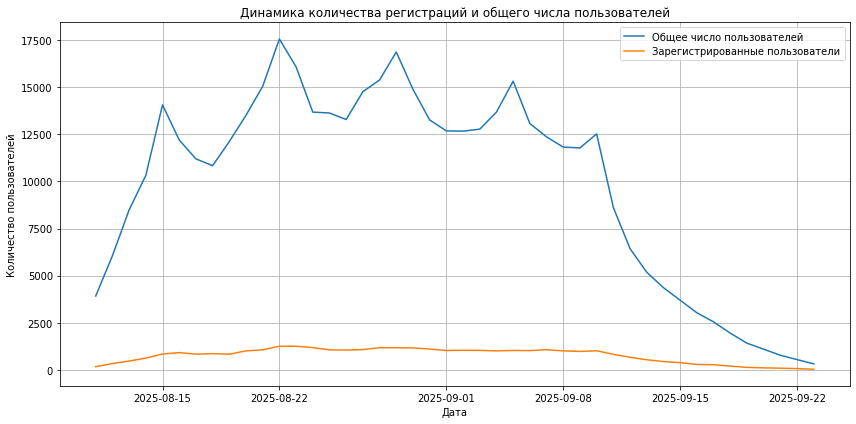

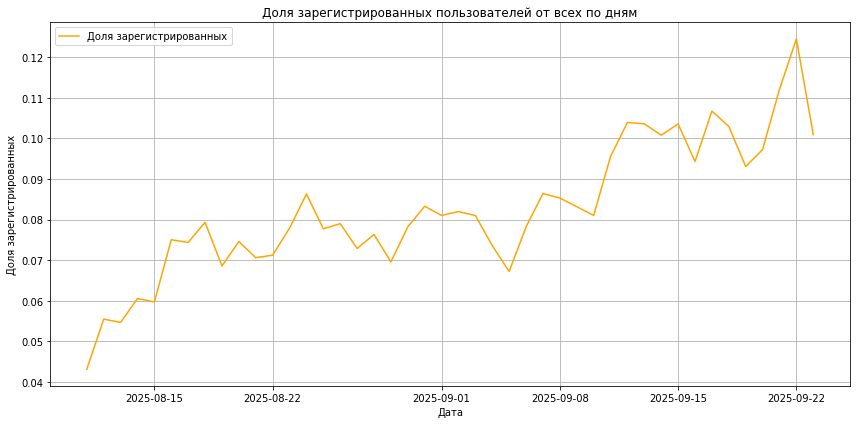

In [4]:

# Переводим стб с датой в нужный тип данных
df_sessions_history['session_date'] = pd.to_datetime(df_sessions_history['session_date'])

# 1. Получаем список уникальных пользователей за каждый день
daily_unique_users = (
    df_sessions_history.groupby('session_date')['user_id']
    .nunique()
    .reset_index(name='total_users')
)
# 2Получаем список зарегистрированных пользователей за каждый день
registered_daily = (
    df_sessions_history[df_sessions_history['registration_flag'] == 1]
    .groupby('session_date')['user_id']
    .nunique()
    .reset_index(name='registered_users')
)

# 3. Объединяем данные по датам
daily_stats = pd.merge(daily_unique_users, registered_daily, on='session_date', how='left')
daily_stats['registered_users'] = daily_stats['registered_users'].fillna(0)

# 4. Расчет доли зарегистрированных пользователей
daily_stats['share_registered'] = daily_stats['registered_users'] / daily_stats['total_users']

# Создаем таблицу с уникальными пользователями за каждый день
daily_unique_users = df_sessions_history.groupby('session_date')['user_id'].nunique().reset_index(name='total_users')

# Построение графиков

# График 1: Общее число пользователей и зарегистрированных по дням
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['session_date'], daily_stats['total_users'], label='Общее число пользователей')
plt.plot(daily_stats['session_date'], daily_stats['registered_users'], label='Зарегистрированные пользователи')
plt.title('Динамика количества регистраций и общего числа пользователей')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# График 2: Доля зарегистрированных от всех по дням
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['session_date'], daily_stats['share_registered'], label='Доля зарегистрированных', color='orange')
plt.title('Доля зарегистрированных пользователей от всех по дням')
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
Большинство пользователей, активно использующих приложение, не регистрируются. Нужно детальнее разобрать причину, придумать, что могло бы замотивироватьрегистрироваться.
Однако доля зарегистрированных пользователей выросла с 4% до 12% за выбранный период, что указывает на улучшение конверсии в регистрацию. Рекомендовано провести исследование в этом направлении.

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

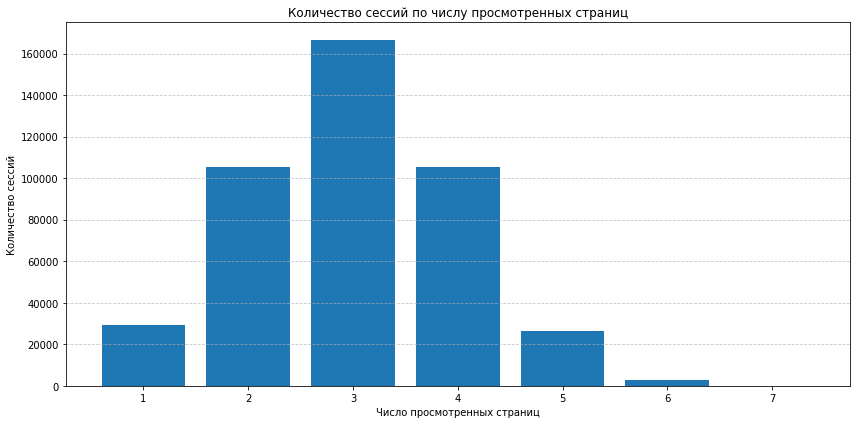

In [5]:
 # 1. Группируем по количеству просмотренных страниц и считаем число сессий для каждого значения
sessions_per_page_count = (
    df_sessions_history.groupby('page_counter')['session_id']
    .count()
    .reset_index(name='session_count')
)

# 2. Сортируем по количеству просмотренных страниц для более читаемой визуализации (по желанию)
sessions_per_page_count = sessions_per_page_count.sort_values('page_counter')

# 3. Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(sessions_per_page_count['page_counter'], sessions_per_page_count['session_count'])
plt.title('Количество сессий по числу просмотренных страниц')
plt.xlabel('Число просмотренных страниц')
plt.ylabel('Количество сессий')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
Большинство сессий (около 160 000) имеют 3 просмотренные страницы, что указывает на низкую вовлеченность пользователей.

Резкое снижение активности после 3 страниц - вероятно, что пользователи редко углубляются в контент.

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

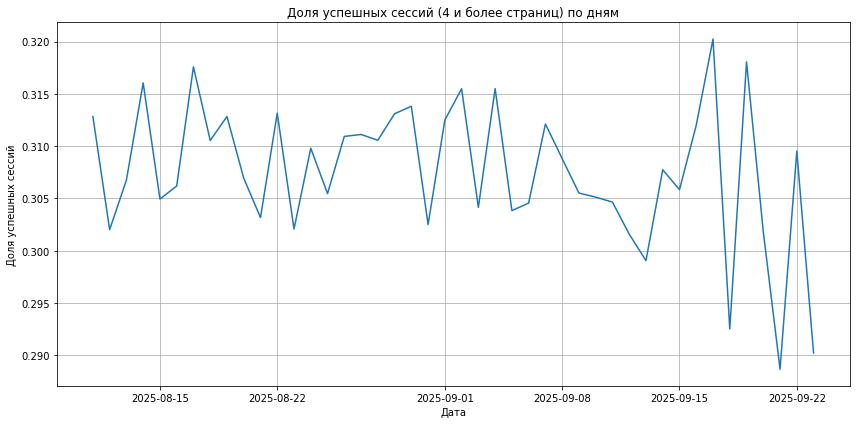

In [6]:
# 1. Создаем столбец good_session: 1, если просмотрено 4 и более страниц, иначе 0
df_sessions_history['good_session'] = (df_sessions_history['page_counter'] >= 4).astype(int)

# 2. Убедимся, что дата в нужном формате
df_sessions_history['session_date'] = pd.to_datetime(df_sessions_history['session_date'])

# 3. Группируем по дате и считаем среднее значение good_session (доля успешных сессий)
daily_good_session_ratio = (
    df_sessions_history.groupby('session_date')['good_session']
    .mean()
    .reset_index(name='avg_good_session_ratio')
)

# 4. Строим график
plt.figure(figsize=(12, 6))
plt.plot(daily_good_session_ratio['session_date'], daily_good_session_ratio['avg_good_session_ratio'])
plt.title('Доля успешных сессий (4 и более страниц) по дням')
plt.xlabel('Дата')
plt.ylabel('Доля успешных сессий')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
Вовлеченность стабильно невысока. Доля сессий с 4+ просмотренными страницами колеблется в диапазоне 29–32% без явного тренда на рост или падение.
Резкие скачки и падения могут быть связаны с изменениями в активности пользователей или качеством контента в отдельные дни.


### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [7]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Необходимый размер выборки для каждой группы 17 441

#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [8]:
from math import ceil

In [9]:

# Среднее количество пользователей приложения в день по историческим данным
avg_unique_users = int(daily_unique_users.mean())

# Размер выборки для обеих групп (17,441 для каждой, всего 34,882)
total_sample_size = 17441 * 2
# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(total_sample_size / avg_unique_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_unique_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907 пользователей в день составит 4 дней


/tmp/ipykernel_49/1682551173.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avg_unique_users = int(daily_unique_users.mean())


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

Нкобходимый минимальный срок проведения теста - 4 дня , однако для повышения надёжности результатов теста желательно провести его дольше — 7 дней, чтобы сгладить возможные колебания в поведении пользователей по дням недели и собрать больше данных для анализа.      

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [10]:
# Загрузка данных
df_sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')
df_sessions_test_part.info()
df_sessions_test_part.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            3130 non-null   object
 1   session_id         3130 non-null   object
 2   session_date       3130 non-null   object
 3   session_start_ts   3130 non-null   object
 4   install_date       3130 non-null   object
 5   session_number     3130 non-null   int64 
 6   registration_flag  3130 non-null   int64 
 7   page_counter       3130 non-null   int64 
 8   region             3130 non-null   object
 9   device             3130 non-null   object
 10  test_group         3130 non-null   object
dtypes: int64(3), object(8)
memory usage: 269.1+ KB


,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B
1,3A2BF4D364E62D89,216FC619308F8788,2025-10-14,2025-10-14 21:11:04,2025-10-14,1,0,3,MENA,iPhone,A
2,79CDAE11E32B1597,EDFCE4AC1A504074,2025-10-14,2025-10-14 21:44:03,2025-10-14,1,0,3,CIS,iPhone,A
3,D6AF8D78297A931F,CF0AC0EEDE92C690,2025-10-14,2025-10-14 19:07:55,2025-10-14,1,0,4,CIS,PC,A
4,37E0CE723AE568E0,2E6ED45E8C86C4E9,2025-10-14,2025-10-14 15:39:44,2025-10-14,1,0,3,CIS,Mac,B


In [11]:
# Преобразование столбца 'date' в тип datetime
df_sessions_test_part['session_date'] = pd.to_datetime(df_sessions_test_part['session_date'])

In [12]:
import seaborn as sns

In [13]:
# Подсчет уникальных пользователей по группам
users_a = df_sessions_test_part[df_sessions_test_part['test_group']== 'A']['user_id'].nunique()
users_b = df_sessions_test_part[df_sessions_test_part['test_group']== 'B']['user_id'].nunique()

# Вывод количества уникальных пользователей в каждой группе
print(f'Количество уникальных пользователей в группе A {users_a} и B {users_b}')

user_counts_diff = 100 * ((users_a -users_b)/ users_a)
# Вывод процентной разницы
print(f"Процентная разница в количестве пользователей между группами A и B по дням: {user_counts_diff:.2f}%")

Количество уникальных пользователей в группе A 1477 и B 1466
Процентная разница в количестве пользователей между группами A и B по дням: 0.74%


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
Количество уникальных пользователей в группе A 1477 и B 1466
Процентная разница в количестве пользователей между группами A и B по дням: 0.74%

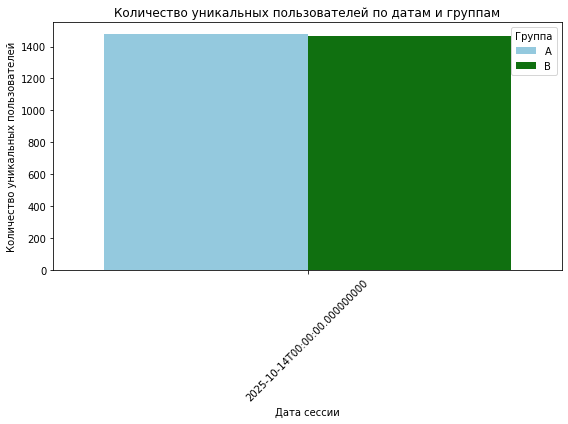

In [14]:
# Визуализация количества пользователей в группах A и B
# Создаем агрегированный DataFrame
df_unique_users = (
    df_sessions_test_part.groupby(['session_date', 'test_group'])['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'unique_users'})
)

# Строим график с помощью seaborn
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_unique_users,
    x='session_date',
    y='unique_users',
    hue='test_group',
    palette=['skyblue', 'green']
)
plt.title('Количество уникальных пользователей по датам и группам')
plt.xlabel('Дата сессии')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=45)
plt.legend(title='Группа')
plt.tight_layout()
plt.show()

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [15]:
# Проверяем пересечения пользователей между группами с помощью группировки
intersection_count = df_sessions_test_part.groupby('user_id').agg({'test_group': 'nunique'}).query('test_group > 1')
# Выводим результат
if not intersection_count.empty:
    print(f"Количество пользователей, попавших в обе группы: {intersection_count}")
    print("Пользователи в пересечении:")
    print(intersection_count)
else:
    print("Пересечений между группами A и B нет.")

Пересечений между группами A и B нет.


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

Пересечений между группами A и B нет.


#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


/tmp/ipykernel_49/1434576526.py:17: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  axes[0].pie(device_counts_a, labels=device_counts_a.index,


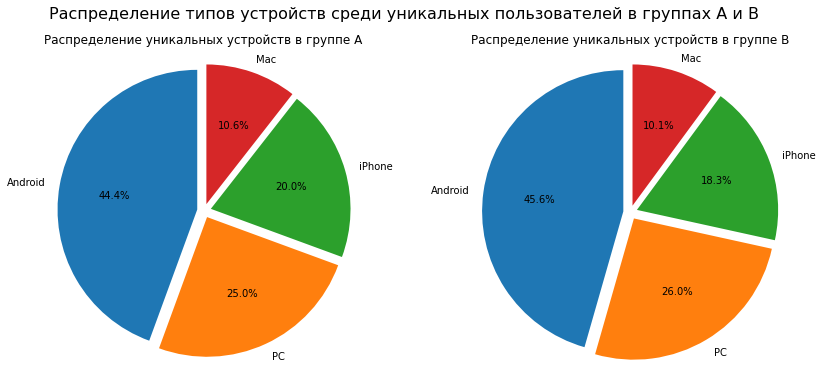

In [16]:
# Фильтруем данные по группам
group_a = df_sessions_test_part[df_sessions_test_part['test_group'] == 'A']
group_b = df_sessions_test_part[df_sessions_test_part['test_group'] == 'B']

# Получаем уникальные устройства для каждой группы
unique_devices_a = group_a[['user_id', 'device']].drop_duplicates()
unique_devices_b = group_b[['user_id', 'device']].drop_duplicates()

# Расчет доли уникальных устройств каждого типа в группах
device_counts_a = unique_devices_a['device'].value_counts(normalize=True)
device_counts_b = unique_devices_b['device'].value_counts(normalize=True)

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Диаграмма для группы A
axes[0].pie(device_counts_a, labels=device_counts_a.index,
            autopct='%1.1f%%', startangle=90,
           explode=[0.05]*len(device_counts_a) # выделяем каждый сегмент для лучшей визуализации
           )
axes[0].set_title('Распределение уникальных устройств в группе A')
axes[0].axis('equal')  # чтобы круг был кругом

# Диаграмма для группы B
axes[1].pie(device_counts_b, labels=device_counts_b.index,
            autopct='%1.1f%%', startangle=90,
           explode=[0.05]*len(device_counts_b) # выделяем каждый сегмент для лучшей визуализации
           )
axes[1].set_title('Распределение уникальных устройств в группе B')
axes[1].axis('equal')

# Общий заголовок
plt.suptitle('Распределение типов устройств среди уникальных пользователей в группах A и B', fontsize=16)

plt.show()

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


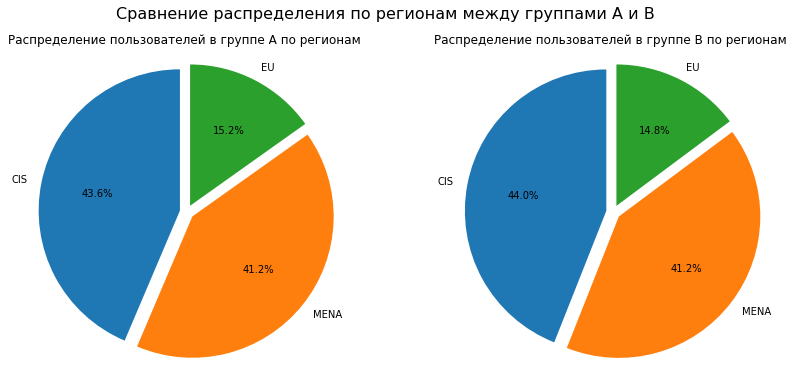

In [17]:
# Фильтруем данные по группам
group_a = df_sessions_test_part[df_sessions_test_part['test_group'] == 'A']
group_b = df_sessions_test_part[df_sessions_test_part['test_group'] == 'B']

# Получаем уникальные устройства для каждой группы
unique_region_a = group_a[['user_id', 'region']].drop_duplicates()
unique_region_b = group_b[['user_id', 'region' ]].drop_duplicates()

# Расчет доли уникальных устройств каждого типа в группах
region_dist_a = unique_region_a['region'].value_counts(normalize=True)
region_dist_b = unique_region_b['region'].value_counts(normalize=True)
# Получаем распределение устройств для каждой группы
#region_dist_a =  df_sessions_test_part[df_sessions_test_part['test_group']== 'A']['region'].value_counts()
#region_dist_b =  df_sessions_test_part[df_sessions_test_part['test_group']== 'B']['region'].value_counts()

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Диаграмма для группы A
axes[0].pie(region_dist_a, labels=region_dist_a.index, autopct='%1.1f%%', startangle=90, explode=[0.05]*len(region_dist_a))
axes[0].set_title('Распределение пользователей в группе A по регионам')
axes[0].axis('equal')  # чтобы круг был кругом

# Диаграмма для группы B
axes[1].pie(region_dist_b, labels=region_dist_b.index, autopct='%1.1f%%', startangle=90, explode=[0.05]*len(region_dist_b))
axes[1].set_title('Распределение пользователей в группе B по регионам')
axes[1].axis('equal')

# Добавляем общий заголовок
plt.suptitle('Сравнение распределения по регионам между группами A и B', fontsize=16)

# Показываем графики
plt.show()

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
###### Различие в количестве пользователей между группами :

Количество уникальных пользователей в группах A и B 1477 и 1466 соответственно - различие в численности групп минимально. Разделение пользователей между группами выполнено корректно. 
Пересечений  между группами A и B нет. 

Распределение типов устройств в группах A и B практически с незначительной разницей
--------группа A |группа B

 Android:   44.4% | 45.6%
 
 iPhone:    20.0% | 18.3%
 
 Mac:       10.6% | 10.1% 
 
 PC:        25.0% | 26.0% 
 

Распределение регионов: 
---- группа A |группа B

CIS:   43.6%  | 44.0%

EU:    15.2%  | 14.8%

MENA:  41.2%  | 41.2%
Распределение по регионам относительно равномерное
A/B-тест проходит корректно, нарушений не выявлено.
Тест проходит корректно

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [18]:
df_sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')
df_sessions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100005 entries, 0 to 100004
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            100005 non-null  object
 1   session_id         100005 non-null  object
 2   session_date       100005 non-null  object
 3   session_start_ts   100005 non-null  object
 4   install_date       100005 non-null  object
 5   session_number     100005 non-null  int64 
 6   registration_flag  100005 non-null  int64 
 7   page_counter       100005 non-null  int64 
 8   region             100005 non-null  object
 9   device             100005 non-null  object
 10  test_group         100005 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [19]:
# Преобразуем session_date в формат даты 
df_sessions_test['session_date'] = pd.to_datetime(df_sessions_test['session_date'])

# Создаем стб good_session: 1, если page_counter >= 4, иначе 0
df_sessions_test['good_session'] = (df_sessions_test['page_counter'] >= 4).astype(int)
# Выводим первые строки датафрейма для проверки
df_sessions_test.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [20]:
from scipy.stats import ttest_ind
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [21]:

# Рассчитываем количество уникальных сессий для каждого дня и группы
unique_sessions = df_sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().reset_index()
unique_sessions.columns = ['session_date', 'test_group', 'session_count']

# Разделение по группам
a_sessions = unique_sessions[unique_sessions['test_group'] == 'A']['session_count']
b_sessions = unique_sessions[unique_sessions['test_group'] == 'B']['session_count']

# Формулировка гипотез:
# H0: Количество уникальных дневных сессий не различается между группами A и B (μ_A = μ_B)
# H1: Количество уникальных дневных сессий различается между группами A и B (μ_A != μ_B)

# Проводим t-тест для проверки равенства средних
t_stat, p_value = ttest_ind(a_sessions, b_sessions, equal_var=False)

# Выводим p-value и интерпретируем результат
print(f'P-value: {p_value:.4f}')
if p_value < 0.05:
    print('P-value < 0.05: Есть значитпльные различия в количестве уникальных дневных сессий между группами')
    print('Возможно есть проблема в распределении пользователей и\или сессий')
else:
    print('P-value >= 0.05: Нет значимых различий в количестве уникальных дневных сессий между группами')
    print('Группы сопоставимы по количеству сессий, тест проведен корректно')

P-value: 0.9382
P-value >= 0.05: Нет значимых различий в количестве уникальных дневных сессий между группами
Группы сопоставимы по количеству сессий, тест проведен корректно


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

P-value: 0.9382
P-value >= 0.05: Нет значимых различий в количестве уникальных дневных сессий между группами
Группы сопоставимы по количеству сессий, тест проведен корректно


#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [22]:
# Рассчет ко-ва успешных сессий и общее ко-во сессий для каждой группы
sessions_group = df_sessions_test.groupby('test_group').agg(
    total_sessions=('session_id', 'count'),
    good_sessions=('good_session', 'sum')
).reset_index()
# Доля успешных сессий
sessions_group['good_session_share'] = sessions_group['good_sessions'] / sessions_group['total_sessions']
# Извлекаем доли для групп A и B
share_a = sessions_group[sessions_group['test_group'] == 'A']['good_session_share'].iloc[0]
share_b = sessions_group[sessions_group['test_group'] == 'B']['good_session_share'].iloc[0]
# Разница в долях (B - A)
diff_share = share_b - share_a
# Выводим результаты
print(f"Доля успешных сессий в группе A: {share_a:.4f}")
print(f"Доля успешных сессий в группе B: {share_b:.4f}")
print(f"Разница в доле успешных сессий (B - A): {diff_share:.4f} ({diff_share * 100:.2f}%)")

Доля успешных сессий в группе A: 0.3077
Доля успешных сессий в группе B: 0.3183
Разница в доле успешных сессий (B - A): 0.0106 (1.06%)


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

Доля успешных сессий в группе A: 0.3077
Доля успешных сессий в группе B: 0.3183
Разница в доле успешных сессий (B - A): 0.0106 (1.06%)

#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [23]:
# Формулировка гипотез:
# H0: Доля успешных сессий в группе A равна доле в группе B (p_A = p_B)
# H1: Доля успешных сессий различается между группами A и B (μ_A != μ_B)

# Проводим z-тест для пропорций
stat, p_value = proportions_ztest(
    count=sessions_group['good_sessions'],  # Количество успехов: [good_sessions_a, good_sessions_b]
    nobs=sessions_group['total_sessions'],  # Общее количество: [total_sessions_a, total_sessions_b]
    alternative='two-sided'  # Проверяем, что доля в A отличается от B (H1: (μ_A != μ_B))
)
# Выводим p-value и интерпретируем результат
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("P-value < 0.05: Есть статистически значимые основания отвергнуть H0")
    print("Различие в доле успешных сессий между группами A и B является статистически значимым.")
else:
    print("P-value >= 0.05: Нет статистически значимых оснований отвергнуть H0")
    print("Различие в доле успешных сессий между группами A и B не является статистически значимым.")

# Выводим агрегированные данные для проверки
print("Агрегированные данные по группам:")
print(sessions_group)

P-value: 0.0003
P-value < 0.05: Есть статистически значимые основания отвергнуть H0
Различие в доле успешных сессий между группами A и B является статистически значимым.
Агрегированные данные по группам:
  test_group  total_sessions  good_sessions  good_session_share
0          A           49551          15248            0.307723
1          B           50454          16059            0.318290


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
P-value: 0.0003
P-value < 0.05: Есть статистически значимые основания отвергнуть H0
Различие в доле успешных сессий между группами A и B является статистически значимым.
Агрегированные данные по группам:
               
-------test_group|total_sessions | good_sessions|  good_session_share
               
---0      |   A     |    49551      |    15248     |    0.307723
               
---1      |   B     |    50454      |    16059     |      0.318290



#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    Характеристики эксперимента:

A/B-тест проводился для понимания влияет ли новый алгоритм рекомендаций на ключевую метрику  (доля успешных сессий 4+ просмотр.стр).
В эксперименте участвовало по 17 441 уникальных пользователяв каждой группе, что соответствует рассчетам размера выборки с парамертами MDE 3%, alpha = 0.05, мощность 0.8.
Минимально необходимая длительность эксперимента составила 4 дня, исходя из среднего дневного трафика в 9 907 уникальных пользователей. Рекомендуемое время проведения теста 7 дней, для учета колебаний активности в будние и выходные.

Влияние нового алгоритма:
Новый алгоритм рекомендаций (группа B) увеличил долю успешных сессий на 1.1% по сравнению с контрольной группой. 
Это улучшение указывает на рост вовлеченности пользователей, так как они чаще просматривают 4 и более страниц за сессию, что соответствует цели эксперимента — повысить удовлетворенность контентом.

Для оценки статистической значимости использовался z-тест для пропорций. Полученное значение p-value составило 0.0003.
P-value < 0.05, что позволяет отвергнуть нулевую гипотезу(доли успешных сессий равны)- новый алгоритм действительно увеличивает просмотр страниц.

Рекомендация по внедрению:
Эффект от новго алгоритма (1.1%) меньше ожидаемого минимального детектируемого эффекта (MDE = 3%), для которого рассчитывался размер выборки. Это говорит о том, что улучшение относительно небольшое. 
Нужно уточнить  был ли расчёт MDE основан на финансовом обосновании или задан приблизительно.
Если же расчёт MDE был ориентировочным, у нас есть основание для внедрения нововведения без повторного тестирования.
Если расчет MDE был точным необходимо оценить экономическую целесообразность введения алгоритма, будет ли он влиять, на доходность, окупится ли изменение.
Возможно, следует провести дополнительный анализ, например, по устройствам или регионам.